In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import cv2
from PIL import Image

%load_ext autoreload
%autoreload 2

In [ ]:
dlc_df.keys()

In [ ]:
dlc_df

In [ ]:
import sys
sys.path.append('D:/Pipeline/STA_Pipeline')

from bootstrap_ebc_head import *
from egocentric_head import *

dlc_phy_file = r"\\rhea\E\ephys\20250402_2\WT00033TT\FM_DARK\20250402_2_WT00033TT_F_FM_DARK_DMS_angie_ephys_topDLCephys.h5"

# Load data into dataframes
dlc_df = pd.read_hdf(dlc_phy_file, 'dlc_df')
phy_df = pd.read_hdf(dlc_phy_file, 'phy_df')

# Set parameters for analysis
fps = 59.99
likelihood_threshold = 0.95
model_dt = 1 / fps  # Frame duration in seconds
bin_width = 20  # Bin width for angles
speed_threshold = 0.25
ebc_angle_bin_size = 6
ebc_dist_bin_size = 10

#key on the mouse to use
key = ["neck"]

dist_bins = 480 // ebc_dist_bin_size #480 is approximately half the arena length in pixels

pixels_per_cm = (dlc_df[dlc_df['top_right likelihood'] > likelihood_threshold]['top_right x'].mean() - dlc_df[dlc_df['top_left likelihood'] > likelihood_threshold]['top_left x'].mean()) / 60
print("P/CM: " + str(pixels_per_cm))

MRLs_h, Mrlthresh_h, MALs_h, head_ebc_plot_data, head_distance_bins, ebc_plot_data_binary_head, max_bins_head, pref_dist_head = bootstrap_egocentric_head(dlc_df, phy_df, fps, likelihood_threshold, model_dt, bin_width, dlc_phy_file, speed_threshold, ebc_angle_bin_size, ebc_dist_bin_size)
 

In [ ]:
flattened_array

In [ ]:
# print(lightTotalFires[0][0])
# print(darkTotalFires[0][0])

# len(lightTotalFires)
darkTotalFires[0][0].flatten()

In [38]:
def interpolateMovement(arr):
    arr = pd.Series(arr).interpolate().to_numpy()
    arr = pd.Series(arr).fillna(method='bfill').to_numpy()
    arr = signal.medfilt(arr,kernel_size = 5)
    box_size = 5
    box = np.ones(box_size) / box_size
    arr = np.convolve(arr, box, mode='same')
    return arr

In [ ]:
dlc_df.keys()

In [ ]:
length

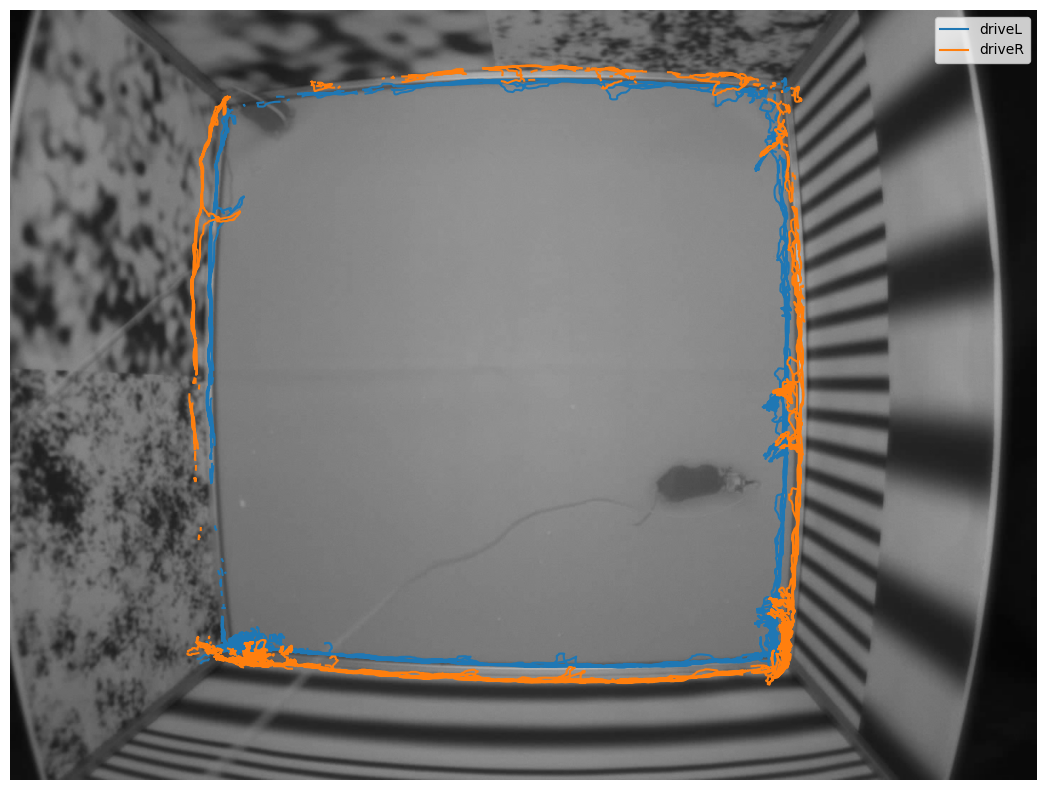

In [13]:
# dlc_phy_file = r"\\rhea\E\ephys\20250205\WT00022RT\FM_LIGHT\20250205_WT00022RT_M_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file = r"\\rhea\E\ephys\20250131\WT00025TT\FM_LIGHT\20250131_WT00025TT_F_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file = r"\\rhea\E\ephys\20250131\WT00025TT\FM_DARK\20250131_WT00025TT_F_FM_DARK_DMS_angie_ephys_topDLCephys.h5"

dlc_phy_file = r"\\rhea\E\ephys\20250429\WT00035LT\FM_LIGHT\20250429_WT00035LT_M_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"


dlc_df = pd.read_hdf(dlc_phy_file, 'dlc_df')



# vid_file = r"\\rhea\E\ephys\20250131\WT00025TT\FM_LIGHT\20250131_WT00025TT_F_FM_LIGHT_DMS_angie_TOP1.avi"
# vid_file = r"\\rhea\E\ephys\20250131\WT00025TT\FM_DARK\20250131_WT00025TT_F_FM_DARK_DMS_angie_TOP1.avi"

# vid_file = r"\\rhea\E\ephys\20250205\WT00022RT\FM_DARK\20250205_WT00022RT_M_FM_DARK_DMS_angie_TOP1.avi"
vid_file = r"\\rhea\E\ephys\20250425\WT0002802\FM_DARK\20250425_WT0002802_M_FM_DARK_DMS_angie_TOP1.avi"
vid = cv2.VideoCapture(vid_file)
length = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

vid.set(cv2.CAP_PROP_POS_FRAMES,0)
ret, frame_1 = vid.read()
vid.set(cv2.CAP_PROP_POS_FRAMES,length-1)
ret, frame_2 = vid.read()
vid.release()

img1 = Image.fromarray(frame_1)
img2 = Image.fromarray(frame_2)

#plot example image
combined_image = Image.blend(img1, img2,alpha=0.5)
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.imshow(combined_image)
ax.axis('off')

keys = ['driveL', 'driveR'] #'nose','left_ear','right_ear',
# keys = ['tailBase'] #['earL', 'earR', 'nose','left_ear','right_ear',
threshold = 0.95
for key in keys:
    x_vals = dlc_df[key + ' x'].copy()
    y_vals = dlc_df[key + ' y'].copy()
    x_vals[dlc_df[key + ' likelihood']<threshold] = np.nan
    y_vals[dlc_df[key + ' likelihood']<threshold] = np.nan
    # x_vals = interpolateMovement(x_vals)
    # y_vals = interpolateMovement(y_vals)
    ax.plot(x_vals,y_vals,label=key)

plt.legend()

# pixels_per_cm = pixels_per_cm
# velocityX = np.diff(x_vals/pixels_per_cm) * 60
# velocityY = np.diff(y_vals/pixels_per_cm) * 60
# totalVelocity = np.sqrt((velocityX ** 2) + (velocityY ** 2))
# totalVelocity[0] = totalVelocity[2]
# totalVelocity[1] = totalVelocity[2]
# totalVelocity[-1] = totalVelocity[-3]
# totalVelocity[-2] = totalVelocity[-3]

# for i in range(0, len(totalVelocity)):
#     if totalVelocity[i] > 40:
#         totalVelocity[i] = np.nan


In [114]:
len(img)

76

In [ ]:
print(f"place_cell_plots shape: {np.array(place_cell_plots).shape}")  # Should be (28, 20, 20)

# Then index it to check the shape of the individual place cell plot
print(f"Shape of place_cell_plots[{i}]: {np.array(place_cell_plots[i]).shape}")  # Should be (20, 20)

In [ ]:
import speed


In [ ]:
import sys
sys.path.append('D:/Pipeline/STA_Pipeline')

from place_cells import *

# Set parameters for analysis
fps = 59.99
likelihood_threshold = 0.25
model_dt = 1 / fps  # Frame duration in seconds
bin_width = 20  # Bin width for angles
speed_threshold = 0.25
ebc_angle_bin_size = 6
ebc_dist_bin_size = 10
dist_bins = 480 // ebc_dist_bin_size #480 is approximately half the arena length in pixels

dlc_phy_file_light = r"\\rhea\E\ephys\20250205\WT00022RT\FM_LIGHT\20250205_WT00022RT_M_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"

# Load data into dataframes
dlc_df_light = pd.read_hdf(dlc_phy_file_light, 'dlc_df')
phy_df_light = pd.read_hdf(dlc_phy_file_light, 'phy_df')


dlc_phy_file_dark = r"\\rhea\E\ephys\20250205\WT00022RT\FM_DARK\20250205_WT00022RT_M_FM_DARK_DMS_angie_ephys_topDLCephys.h5"

# Load data into dataframes
dlc_df_dark = pd.read_hdf(dlc_phy_file_dark, 'dlc_df')
phy_df_dark = pd.read_hdf(dlc_phy_file_dark, 'phy_df')

lightPlaceCells = place_cells(dlc_df_light, phy_df_light, fps, likelihood_threshold, model_dt, bin_width, dlc_phy_file_light, speed_threshold)
darkPlaceCells = place_cells(dlc_df_dark, phy_df_dark, fps, likelihood_threshold, model_dt, bin_width, dlc_phy_file_dark, speed_threshold)

for i in range(len(lightPlaceCells[0])):  # Only running once, so should only generate one plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Unpacking the place cell data
    place_cell_plots, x_edges, y_edges = lightPlaceCells
    pc1 = ax1.imshow(place_cell_plots[i], origin='lower', aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], vmin=0)
    ax1.set_ylabel('Y position')
    ax1.set_title('Light') 
    ax1.axis("square")
    lightMax = np.max(place_cell_plots[i].flatten())

    place_cell_plots, x_edges, y_edges = darkPlaceCells
    pc2 = ax2.imshow(place_cell_plots[i], origin='lower', aspect='auto', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], vmin=0)
    ax2.set_ylabel('Y position')
    ax2.set_title('Dark') 
    ax2.axis("square")
    darkMax = np.max(place_cell_plots[i].flatten())

    pc1.set_clim(vmax=max(lightMax, darkMax))
    pc2.set_clim(vmax=max(lightMax, darkMax))
    plt.tight_layout()
    fig.suptitle("Cell " + str(phy_df_light.iloc[i].name))
    fig.colorbar(pc2, ax=[ax1, ax2], orientation='vertical', fraction=0.02, pad=0.04)
    plt.show()

In [ ]:
pixels_per_cm_light

([<matplotlib.axis.XTick at 0x2e8951a8910>,
 [Text(0.0, 0, '0'),
  Text(0.05, 0, '5'),
  Text(0.1, 0, '10'),
  Text(0.15000000000000002, 0, '15'),
  Text(0.2, 0, '20'),
  Text(0.25, 0, '25'),
  Text(0.30000000000000004, 0, '30'),
  Text(0.35000000000000003, 0, '35'),
  Text(0.4, 0, '40'),
  Text(0.45, 0, '45'),
  Text(0.5, 0, '50'),
  Text(0.55, 0, '55'),
  Text(0.6000000000000001, 0, '60'),
  Text(0.65, 0, '65'),
  Text(0.7000000000000001, 0, '70'),
  Text(0.75, 0, '75'),
  Text(0.8, 0, '80'),
  Text(0.8500000000000001, 0, '85'),
  Text(0.9, 0, '90'),
  Text(0.9500000000000001, 0, '95'),
  Text(1.0, 0, '100')])

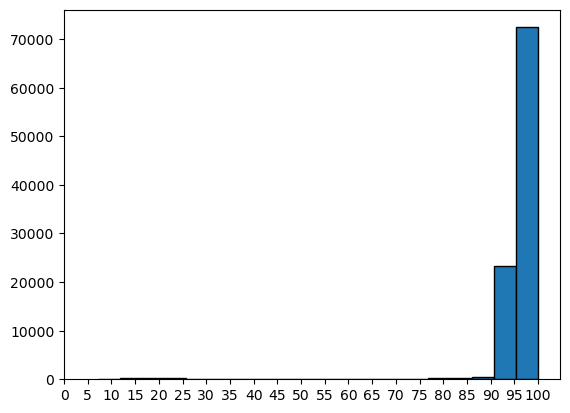

In [35]:

dlc_phy_file = r"\\rhea\E\ephys\20250220\WT00022LN\FM_light\20250220_WT00022LN_M_FM_light_DMS_angie_ephys_topDLCephys.h5"


dlc_df = pd.read_hdf(dlc_phy_file, 'dlc_df')
hist = plt.hist(dlc_df['bottom_right likelihood'], 20, ec="black")
plt.xticks(np.arange(0, 1.05, 0.05))
plt.xticks(np.arange(0, 1.05, 0.05), np.arange(0,101, 5))

In [142]:
np.where(dlc_df_light['earL likelihood'] == 1)

(array([ 2853,  6656,  9503,  9528, 10860, 10864, 10867, 14119, 18368,
        18383, 18385, 18387, 18395, 18399, 18400, 18417, 18427, 18428,
        18430, 18434, 20426, 25703, 38119, 38120, 38121, 38126, 44023,
        44024, 44025, 44129, 51367, 51453, 51471, 51503, 51504, 52421,
        52422, 52423, 52424, 65270, 65271, 65454, 65473, 65474, 65489,
        65490, 65491, 65493, 65494, 65495, 65496, 65497, 65498, 65499,
        65500, 65501, 65502, 65503, 65504, 65505, 79126, 79128, 79132,
        79133, 79134, 79135, 79136, 79173], dtype=int64),)

In [6]:
np.array(head_ebc_plot_data_light).shape
# head_ebc_plot_data_dark[i].flatten().shape

(5, 48, 60)

P/CM LIGHT: 12.862351481119791
P/CM DARK: 12.848972574869792


2025-05-02 14:20:51,042	INFO worker.py:1553 -- Started a local Ray instance.
d:\Pipeline\STA_Pipeline\bootstrap_ebc_head.py:144: RuntimeWarning: invalid value encountered in divide
  cell_spikes_avg = np.divide(cell_spikes_avg,ebc_data_avg)
d:\Pipeline\STA_Pipeline\bootstrap_ebc_head.py:144: RuntimeWarning: invalid value encountered in divide
  cell_spikes_avg = np.divide(cell_spikes_avg,ebc_data_avg)
d:\Pipeline\STA_Pipeline\bootstrap_ebc_head.py:144: RuntimeWarning: invalid value encountered in divide
  cell_spikes_avg = np.divide(cell_spikes_avg,ebc_data_avg)
d:\Pipeline\STA_Pipeline\bootstrap_ebc_head.py:144: RuntimeWarning: invalid value encountered in divide
  cell_spikes_avg = np.divide(cell_spikes_avg,ebc_data_avg)
d:\Pipeline\STA_Pipeline\bootstrap_ebc_head.py:144: RuntimeWarning: invalid value encountered in divide
  cell_spikes_avg = np.divide(cell_spikes_avg,ebc_data_avg)
2025-05-02 14:21:22,223	INFO worker.py:1553 -- Started a local Ray instance.
d:\Pipeline\STA_Pipeline\b

(5, 48, 60)


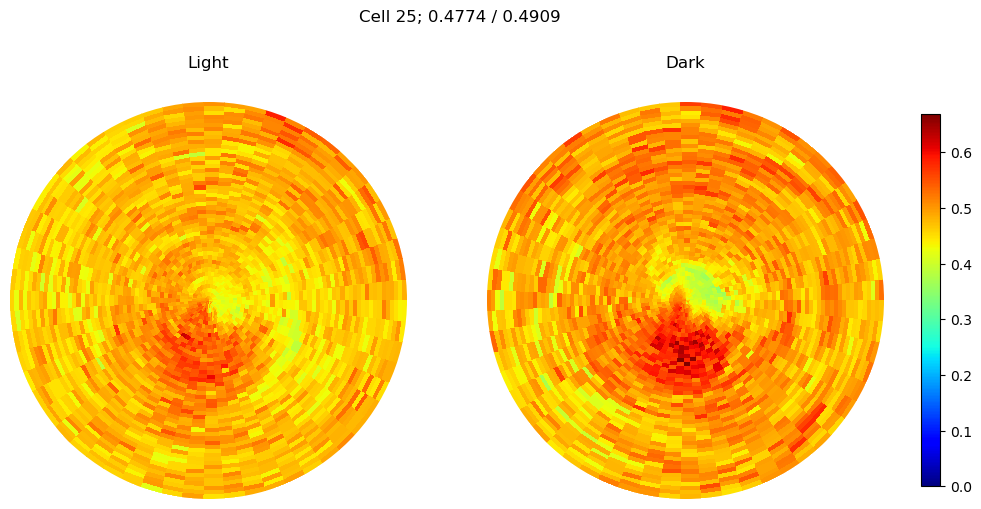

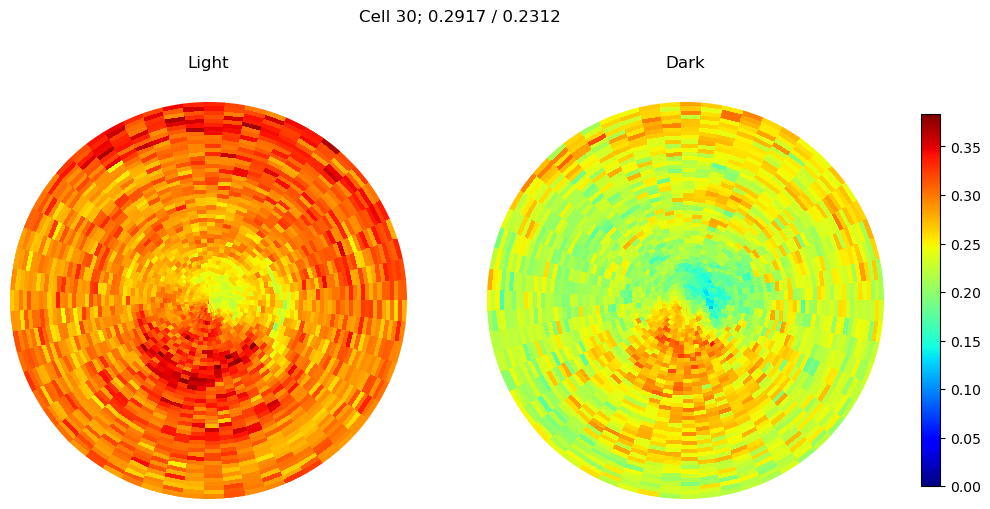

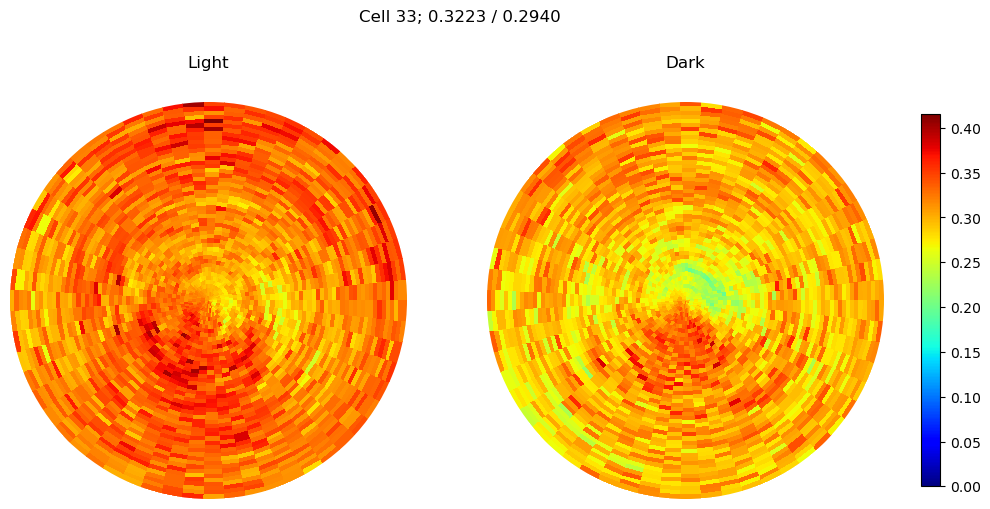

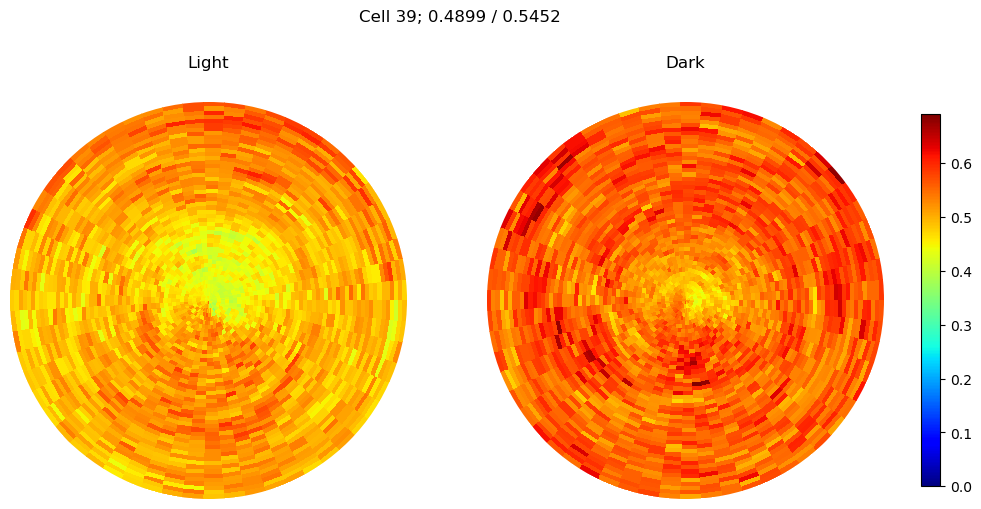

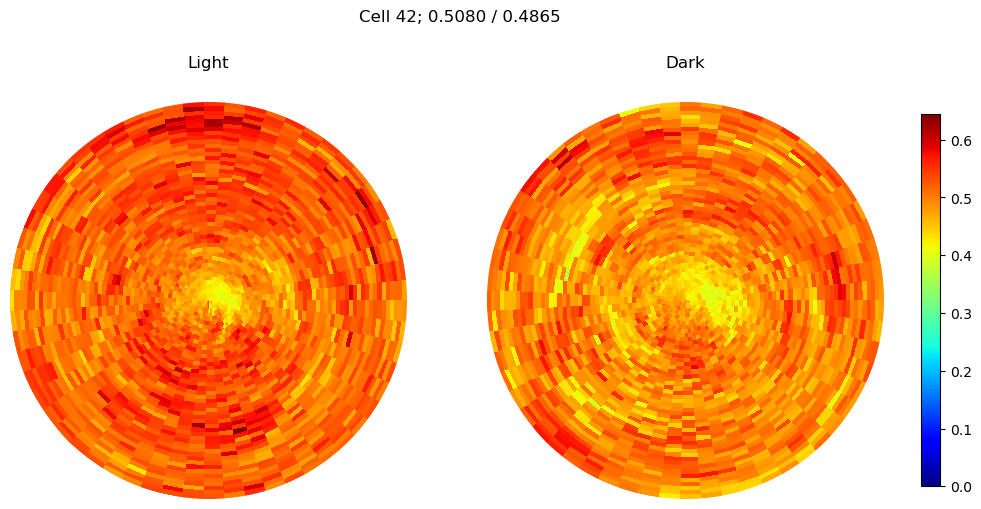

In [1]:
import sys
sys.path.append('D:/Pipeline/STA_Pipeline')

from bootstrap_ebc_head import *
from egocentric_head import *

# Set parameters for analysis
fps = 59.99
likelihood_threshold = 0.95
model_dt = 1 / fps  # Frame duration in seconds
bin_width = 20  # Bin width for angles
speed_threshold = 0.5
ebc_angle_bin_size = 6
ebc_dist_bin_size = 10
dist_bins = 480 // ebc_dist_bin_size #480 is approximately half the arena length in pixels

# dlc_phy_file_light = r"\\rhea\E\ephys\20250131\WT00025TT\FM_LIGHT\20250131_WT00025TT_F_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file_light = r"\\rhea\E\ephys\20250205\WT00022RT\FM_LIGHT\20250205_WT00022RT_M_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"
dlc_phy_file_light = r"\\rhea\E\ephys\20250220\WT00022LN\FM_light\20250220_WT00022LN_M_FM_light_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file_light = r"\\rhea\E\ephys\20250402_2\WT00033TT\FM_LIGHT\20250402_2_WT00033TT_F_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file_light = r"\\rhea\E\ephys\20250408\WT00034TT\FM_LIGHT\20250408_WT00034TT_M_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"



# Load data into dataframes
dlc_df_light = pd.read_hdf(dlc_phy_file_light, 'dlc_df')
phy_df_light = pd.read_hdf(dlc_phy_file_light, 'phy_df')


# dlc_phy_file_dark = r"\\rhea\E\ephys\20250131\WT00025TT\FM_DARK\20250131_WT00025TT_F_FM_DARK_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file_dark = r"\\rhea\E\ephys\20250205\WT00022RT\FM_DARK\20250205_WT00022RT_M_FM_DARK_DMS_angie_ephys_topDLCephys.h5"
dlc_phy_file_dark = r"\\rhea\E\ephys\20250220\WT00022LN\FM_DARK\20250220_WT00022LN_M_FM_DARK_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file_dark = r"\\rhea\E\ephys\20250402_2\WT00033TT\FM_DARK\20250402_2_WT00033TT_F_FM_DARK_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file_dark = r"\\rhea\E\ephys\20250408\WT00034TT\FM_DARK\20250408_WT00034TT_M_FM_DARK_DMS_angie_ephys_topDLCephys.h5"


# Load data into dataframes
dlc_df_dark = pd.read_hdf(dlc_phy_file_dark, 'dlc_df')
phy_df_dark = pd.read_hdf(dlc_phy_file_dark, 'phy_df')

pixels_per_cm_light = (dlc_df_light[dlc_df_light['top_right likelihood'] > 0.95]['top_right x'].median() - dlc_df_light[dlc_df_light['top_left likelihood'] > 0.95]['top_left x'].median()) / 60
print("P/CM LIGHT: " + str(pixels_per_cm_light))

pixels_per_cm_dark = (dlc_df_dark[dlc_df_dark['top_right likelihood'] > 0.95]['top_right x'].median() - dlc_df_dark[dlc_df_dark['top_left likelihood'] > 0.95]['top_left x'].median()) / 60
print("P/CM DARK: " + str(pixels_per_cm_dark))


light_data = bootstrap_egocentric_head(dlc_df_light, phy_df_light, fps, likelihood_threshold, model_dt, bin_width, dlc_phy_file_light, speed_threshold, ebc_angle_bin_size, ebc_dist_bin_size, dist_bins)
dark_data = bootstrap_egocentric_head(dlc_df_dark, phy_df_dark, fps, likelihood_threshold, model_dt, bin_width, dlc_phy_file_dark, speed_threshold, ebc_angle_bin_size, ebc_dist_bin_size, dist_bins)

head_ebc_plot_data_light = light_data[3]
head_distance_bins_light = light_data[4]
head_ebc_plot_data_dark = dark_data[3]
head_distance_bins_dark = dark_data[4]

print(np.array(head_ebc_plot_data_light).shape)

for i in range(len(head_ebc_plot_data_light)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6), subplot_kw={'projection': 'polar'})

    MRLs_h, Mrlthresh_h, MALs_h, _, _, ebc_plot_data_binary_head, max_bins_head, pref_dist_head = light_data
    pixels_per_cm = pixels_per_cm_light
    rbins = head_distance_bins_light.copy()
    abins = np.linspace(0, 2 * np.pi, (360 // ebc_angle_bin_size))
    A, R = np.meshgrid(abins, rbins)
    pc1 = ax1.pcolormesh(A, R, head_ebc_plot_data_light[i], cmap="jet", vmin=0)
    ax1.set_theta_direction(1)
    ax1.set_theta_offset(np.pi)
    ax1.set_title("Light")
    # ax1.set_rticks([0, 200, 400, 600, 800, 1000], labels=np.floor(np.arange(0, 1000 / pixels_per_cm + 1, 200 / pixels_per_cm)))
    ax1.axis('off')
    lightMax = max(head_ebc_plot_data_light[i].flatten())
    lightAvgFires = np.mean(head_ebc_plot_data_light[i].flatten())

    MRLs_h, Mrlthresh_h, MALs_h, _, _, ebc_plot_data_binary_head, max_bins_head, pref_dist_head = dark_data
    pixels_per_cm = pixels_per_cm_dark
    rbins = head_distance_bins_dark.copy()
    abins = np.linspace(0, 2 * np.pi, (360 // ebc_angle_bin_size))
    A, R = np.meshgrid(abins, rbins)
    pc2 = ax2.pcolormesh(A, R, head_ebc_plot_data_dark[i], cmap="jet", vmin=0)
    ax2.set_theta_direction(1)
    ax2.set_theta_offset(np.pi)
    ax2.set_title("Dark")
    # ax2.set_rticks([0, 200, 400, 600, 800, 1000], labels=np.floor(np.arange(0, 1000 / pixels_per_cm + 1, 200 / pixels_per_cm)))
    ax2.axis('off')
    darkMax = max(head_ebc_plot_data_dark[i].flatten())
    darkAvgFires = np.mean(head_ebc_plot_data_dark[i].flatten())

    pc1.set_clim(vmax=max(lightMax, darkMax))
    pc2.set_clim(vmax=max(lightMax, darkMax))
    fig.colorbar(pc2, ax=[ax1, ax2], orientation='vertical', fraction=0.02, pad=0.04)
    fig.suptitle("Cell " + str(phy_df_light.iloc[i].name + f"; {lightAvgFires:.4f} / {darkAvgFires:.4f}"))

TypeError: list indices must be integers or slices, not tuple

In [ ]:
dlc_phy_file = r"\\rhea\E\ephys\20250205\WT00022RT\FM_LIGHT\20250205_WT00022RT_M_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"
dlc_df = pd.read_hdf(dlc_phy_file, 'dlc_df')

vid_file = r"\\rhea\E\ephys\20250205\WT00022RT\FM_LIGHT\20250205_WT00022RT_M_FM_LIGHT_DMS_angie_TOP1.avi"
vid = cv2.VideoCapture(vid_file)
length = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

vid.set(cv2.CAP_PROP_POS_FRAMES,0)
ret, frame_1 = vid.read()
vid.set(cv2.CAP_PROP_POS_FRAMES,length-1)
ret, frame_2 = vid.read()
vid.release()

img1 = Image.fromarray(frame_1)
img2 = Image.fromarray(frame_2)

#plot example image
combined_image = Image.blend(img1,img2,alpha=0.5)
fig, ax = plt.subplots(1,1,figsize=(20,10))
ax.imshow(combined_image)
ax.axis('off')


In [ ]:

for i in range(10):
    fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(10, 5))
    
    ax2 = plt.subplot(121, projection='polar')
    rbins = head_distance_bins.copy()[:96]
    abins = np.linspace(0, 2 * np.pi, (360 // ebc_angle_bin_size))
    A, R = np.meshgrid(abins, rbins)
    pc = ax2.pcolormesh(A, R, head_ebc_plot_data[i][:96], cmap="jet")
    ax2.set_theta_direction(1)
    ax2.set_theta_offset(np.pi)
    ax2.set_rticks([0, 200, 400, 600, 800, 1000], labels=np.floor(np.arange(0, 1000 / pixels_per_cm + 1, 200 / pixels_per_cm)))
    ax2.set_title("title")
    # ax2.set_rmax(head_distance_bins[24])
    ax2.axis('off')
    fig.colorbar(pc)
    
    ax3 = plt.subplot(122, projection='polar')
    rbins = head_distance_bins.copy()[:48]
    abins = np.linspace(0, 2 * np.pi, (360 // ebc_angle_bin_size))
    A, R = np.meshgrid(abins, rbins)
    pc = ax3.pcolormesh(A, R * 6/3, head_ebc_plot_data[i][:48], cmap="jet")
    ax3.set_theta_direction(1)
    ax3.set_theta_offset(np.pi)
    ax3.set_rticks([0, 200, 400, 600, 800, 1000], labels=np.floor(np.arange(0, 1000 / pixels_per_cm + 1, 200 / pixels_per_cm)))
    ax3.set_title("title")
    # ax3.set_rmax(head_distance_bins[18])
    ax3.axis('off')
    fig.colorbar(pc)


In [ ]:
import sys
sys.path.append('D:/Pipeline/STA_Pipeline')

from bootstrap_ebc_head import *
from egocentric_head import *

dlc_phy_file = r"\\rhea\E\ephys\20241103\WT00024L2\FM_DARK\20241103_WT00024L2_M_FM_DARK_DMS_angie_ephys_topDLCephys.h5"
# dlc_phy_file = r"\\rhea\E\20250205\WT00022RT\FM_LIGHT\20250205_WT00022RT_M_FM_LIGHT_DMS_angie_ephys_topDLCephys.h5"

# Load data into dataframes
dlc_df = pd.read_hdf(dlc_phy_file, 'dlc_df')
phy_df = pd.read_hdf(dlc_phy_file, 'phy_df')

# Set parameters for analysis
fps = 59.99
likelihood_threshold = 0.95
model_dt = 1 / fps  # Frame duration in seconds
bin_width = 20  # Bin width for angles
speed_threshold = 0.25
ebc_angle_bin_size = 6
ebc_dist_bin_size = 10

dist_bins = 480 // ebc_dist_bin_size #480 is approximately half the arena length in pixels

pixels_per_cm = (dlc_df[dlc_df['top_right likelihood'] > likelihood_threshold]['top_right x'].mean() - dlc_df[dlc_df['top_left likelihood'] > likelihood_threshold]['top_left x'].mean()) / 60
print("P/CM: " + str(pixels_per_cm))

MRLs_h, Mrlthresh_h, MALs_h, head_ebc_plot_data, head_distance_bins, ebc_plot_data_binary_head, max_bins_head, pref_dist_head = bootstrap_egocentric_head(dlc_df, phy_df, fps, likelihood_threshold, model_dt, bin_width, dlc_phy_file, speed_threshold, ebc_angle_bin_size, ebc_dist_bin_size)

for i in range(10):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    rbins = head_distance_bins.copy()[:dist_bins]
    abins = np.linspace(0, 2 * np.pi, (360 // ebc_angle_bin_size))
    A, R = np.meshgrid(abins, rbins)
    pc = ax.pcolormesh(A, R, head_ebc_plot_data[i][:dist_bins], cmap="jet")
    ax.set_theta_direction(1)
    ax.set_theta_offset(np.pi)
    ax.set_rticks([0, 200, 400, 600, 800, 1000], labels=np.floor(np.arange(0, 1000 / pixels_per_cm + 1, 200 / pixels_per_cm)))
    ax.set_title("title")
    ax.set_rmax(head_distance_bins[dist_bins])
    ax.axis('off')
    fig.colorbar(pc)

     

In [ ]:
import sys
sys.path.append('D:/Pipeline/STA_Pipeline')

from bootstrap_ebc_head import *
from egocentric_head import *

# Set parameters for analysis
fps = 59.99
likelihood_threshold = 0.90
model_dt = 1 / fps  # Frame duration in seconds
bin_width = 20  # Bin width for angles
speed_threshold = 0.25
ebc_angle_bin_size = 6
ebc_dist_bin_size = 10
dist_bins = 480 // ebc_dist_bin_size #480 is approximately half the arena length in pixels


# dlc_phy_file_dark = r"\\rhea\E\ephys\20250131\WT00025TT\FM_DARK\20250131_WT00025TT_F_FM_DARK_DMS_angie_ephys_topDLCephys.h5"
dlc_phy_file_dark = r"\\rhea\E\ephys\20241103\WT00024L2\FM_DARK\20241103_WT00024L2_M_FM_DARK_DMS_angie_ephys_topDLCephys.h5"

# Load data into dataframes
dlc_df_dark = pd.read_hdf(dlc_phy_file_dark, 'dlc_df')
phy_df_dark = pd.read_hdf(dlc_phy_file_dark, 'phy_df')

pixels_per_cm_dark = (dlc_df_dark[dlc_df_dark['top_right likelihood'] > 0.85]['top_right x'].median() - dlc_df_dark[dlc_df_dark['top_left likelihood'] > 0.85]['top_left x'].median()) / 60
print("P/CM DARK: " + str(pixels_per_cm_dark))

dark_data = bootstrap_egocentric_head(dlc_df_dark, phy_df_dark, fps, likelihood_threshold, model_dt, bin_width, dlc_phy_file_dark, speed_threshold, ebc_angle_bin_size, ebc_dist_bin_size)

for i in range(len(dark_data[3])):
    fig, (ax2) = plt.subplots(1, 1, figsize=(12,6), subplot_kw={'projection': 'polar'})

    MRLs_h, Mrlthresh_h, MALs_h, head_ebc_plot_data, head_distance_bins, ebc_plot_data_binary_head, max_bins_head, pref_dist_head = dark_data
    pixels_per_cm = pixels_per_cm_dark
    rbins = head_distance_bins.copy()[:dist_bins]
    abins = np.linspace(0, 2 * np.pi, (360 // ebc_angle_bin_size))
    A, R = np.meshgrid(abins, rbins)
    pc2 = ax2.pcolormesh(A, R, head_ebc_plot_data[i][:dist_bins], cmap="jet", vmin=0)
    ax2.set_theta_direction(1)
    ax2.set_theta_offset(np.pi)
    ax2.set_title("Dark")
    # ax2.set_rticks([0, 200, 400, 600, 800, 1000], labels=np.floor(np.arange(0, 1000 / pixels_per_cm + 1, 200 / pixels_per_cm)))
    ax2.axis('off')
    ax2.set_rmax(head_distance_bins[dist_bins])
    darkMax = max(head_ebc_plot_data[i][:dist_bins].flatten())
    darkAvgFires = np.mean(head_ebc_plot_data[i][:dist_bins].flatten())

In [ ]:
dlc_phy_file_dark = r"\\rhea\E\ephys\20241103\WT00024L2\FM_DARK\20241103_WT00024L2_M_FM_DARK_DMS_angie_ephys_topDLCephys.h5"

# Load data into dataframes
dlc_df_dark = pd.read_hdf(dlc_phy_file_dark, 'dlc_df')
phy_df_dark = pd.read_hdf(dlc_phy_file_dark, 'phy_df')